<a href="https://fontmeme.com/es/fuente-de-buscando-a-nemo/"><img src="https://fontmeme.com/permalink/240605/9684f48f3e5b401250039830c8bf6873.png" alt="fuente-de-buscando-a-nemo" border="0"></a>

---

![Internet insuficiente.](https://asc-aqua.org/wp-content/uploads/2023/03/shutterstock_1916916224-1-2500x1250.jpg)



> 🧑Bustamante Juárez Eduardo. 🔢 Matrícula: 10056926 📬eduardo.bustamantej@uaem.edu.mx

> 🏫 Centro de Investigación en Ciencias (UAEM). 📌 Cuernavaca, Morelos.
> 🌐 [Datos almacenados en Carpeta Drive](https://drive.google.com/drive/folders/1ZwhPfvGgJbIhCbWhqReYbAZj4T_eAMTh?usp=sharing)

> 📈[Data](https://archive.ics.uci.edu/dataset/1/abalone)



**Información:**

Predecir la edad de abulón a partir de mediciones físicas.  La edad de abulón está determinada cortando la cáscara a través del cono, manchandola y contando el número de anillos a través de un microscopio - una tarea aburrido y que consume mucho tiempo.  Otras mediciones, que son más fáciles de obtener, se utilizan para predecir la edad.  Se puede necesitar más información, como los patrones meteorológicos y la ubicación (de ahí la disponibilidad de alimentos) para resolver el problema.

## 📉 Presentación del **Dataset**.

Importación de las librerías necesarias. 

In [61]:
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.display import display
from matplotlib import pyplot as plt
# Indica a matplotlib que incruste las gráficas en el cuaderno (notebook)
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report, accuracy_score

In [7]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


Importación de los datos desde la [UCI](https://archive.ics.uci.edu/dataset/1/abalone) con DOI [10.24432/C55C7W](https://doi.org/10.24432/C55C7W) y Licencia [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/legalcode)

In [8]:
from ucimlrepo import fetch_ucirepo 

abalone = fetch_ucirepo(id=1) 

xP = abalone.data.features 
yP = abalone.data.targets 


In [9]:
display(xP) 


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [10]:
display(yP) 

,Rings
0,15
1,7
2,9
3,10
4,7
...,...
4172,11
4173,10
4174,9
4175,10


| Nombre variable      | Tipo        | Descripción                                  | Unidades |
|----------------------|-------------|----------------------------------------------|----------|
| Sexo                 | Categorical | M, F o I (infante)                           |          |
| Longitud             | Continuo    | Medición de conchas más larga                | mm       |
| Diámetro             | Continuo    | Perpendicular a longitud                     | mm       |
| Altura               | Continuo    | Con carne en concha                          | mm       |
| peso total           | Continuo    | Entero abulón                                | gramos   |
| Peso pelado          | Continuo    | Peso de la carne                             | gramos   |
| Peso de las vísceras | Continuo    | Peso intestinal (después de sangrado)        | gramos   |
| Peso de la concha    | Continuo    | Después de haber secado                      | gramos   |
| Anillos              | Enteger     | 1.5 da la edad en años                       |          |


In [11]:
yP["Rings"] = yP["Rings"] + 1.5

C:\Users\Busta\AppData\Local\Temp\ipykernel_8500\3432570753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yP["Rings"] = yP["Rings"] + 1.5


# 🫧 Preprocesamiento de los datos.

In [12]:
datosUnicos = {}

# Iterar sobre las columnas especificadas
for columna in xP.columns:
    # Contar los datos faltantes en cada columna
    datosUnicos[columna] = xP[columna].unique()

# Crear un DataFrame a partir del diccionario
dfDatosUnicos = pd.DataFrame(list(datosUnicos.items()), columns=['Columna', 'Datos Unicos'])

# Mostrar el DataFrame
print(dfDatosUnicos)

          Columna                                       Datos Unicos
0             Sex                                          [M, F, I]
1          Length  [0.455, 0.35, 0.53, 0.44, 0.33, 0.425, 0.545, ...
2        Diameter  [0.365, 0.265, 0.42, 0.255, 0.3, 0.415, 0.425,...
3          Height  [0.095, 0.09, 0.135, 0.125, 0.08, 0.15, 0.14, ...
4    Whole_weight  [0.514, 0.2255, 0.677, 0.516, 0.205, 0.3515, 0...
5  Shucked_weight  [0.2245, 0.0995, 0.2565, 0.2155, 0.0895, 0.141...
6  Viscera_weight  [0.101, 0.0485, 0.1415, 0.114, 0.0395, 0.0775,...
7    Shell_weight  [0.15, 0.07, 0.21, 0.155, 0.055, 0.12, 0.33, 0...


In [13]:
print(yP["Rings"].unique())

[16.5  8.5 10.5 11.5  9.5 21.5 17.5 20.5 15.5 12.5 13.5 19.5 14.5  6.5
  5.5  7.5 22.5 18.5 23.5  2.5  4.5 27.5 24.5 30.5  3.5 28.5 26.5 25.5]


Impresión en pantalla de las estadísticas descriptivas para cada columna numérica.

In [14]:
display(xP.describe())

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


In [15]:
display(yP.describe())

,Rings
count,4177.000000
mean,11.433684
std,3.224169
min,2.500000
25%,9.500000
50%,10.500000
75%,12.500000
max,30.500000


In [16]:
print("xP:\n",xP.dtypes,"\nyP: \n",yP.dtypes)

xP:
 Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
dtype: object 
yP: 
 Rings    float64
dtype: object


In [17]:
datos_faltantes = {}

# Iterar sobre las columnas especificadas
for columna in xP.columns:
    # Contar los datos faltantes en cada columna
    datos_faltantes[columna] = xP[xP[columna].isnull()].shape[0]

# Crear un DataFrame a partir del diccionario
df_datos_faltantes = pd.DataFrame(list(datos_faltantes.items()), columns=['Columna', 'Valores faltantes'])

# Mostrar el DataFrame
print(df_datos_faltantes)

          Columna  Valores faltantes
0             Sex                  0
1          Length                  0
2        Diameter                  0
3          Height                  0
4    Whole_weight                  0
5  Shucked_weight                  0
6  Viscera_weight                  0
7    Shell_weight                  0


In [18]:
print(xP.isnull().sum())

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
dtype: int64


In [19]:
print(yP[yP["Rings"].isnull()].shape[0])
print(yP.isnull().sum())

0
Rings    0
dtype: int64


In [20]:
# Codificación de variable categórica
xP["Sex"] = LabelEncoder().fit_transform(xP["Sex"])

C:\Users\Busta\AppData\Local\Temp\ipykernel_8500\1420580866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xP["Sex"] = LabelEncoder().fit_transform(xP["Sex"])


In [21]:
display(xP) 

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


# 🕵️ Inspección. 

| Nombre variable      | Papel                   | Tipo        | Descripción                                  | Unidades |
|----------------------|-------------------------|-------------|----------------------------------------------|----------|
| Sexo                 | Caracter de la función  | Categorical | M, F o I (infante)                           |          |
| Longitud             | Caracter de la función  | Continuo    | Medición de conchas más larga                | mm       |
| Diámetro             | Caracter de la función  | Continuo    | Perpendicular a longitud                     | mm       |
| Altura               | Caracter de la función  | Continuo    | Con carne en concha                          | mm       |
| peso total           | Caracter de la función  | Continuo    | Entero abulón                                | gramos   |
| Peso pelado          | Caracter de la función  | Continuo    | Peso de la carne                             | gramos   |
| Peso de las vísceras | Caracter de la función  | Continuo    | Peso intestinal (después de sangrado)        | gramos   |
| Peso de la concha    | Caracter de la función  | Continuo    | Después de haber secado                      | gramos   |
| Anillos              | Objetivo                | Enteger     | 1.5 da la edad en años                       |          |


In [22]:
df = pd.concat([xP, yP], axis=1)
display(df.head())

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


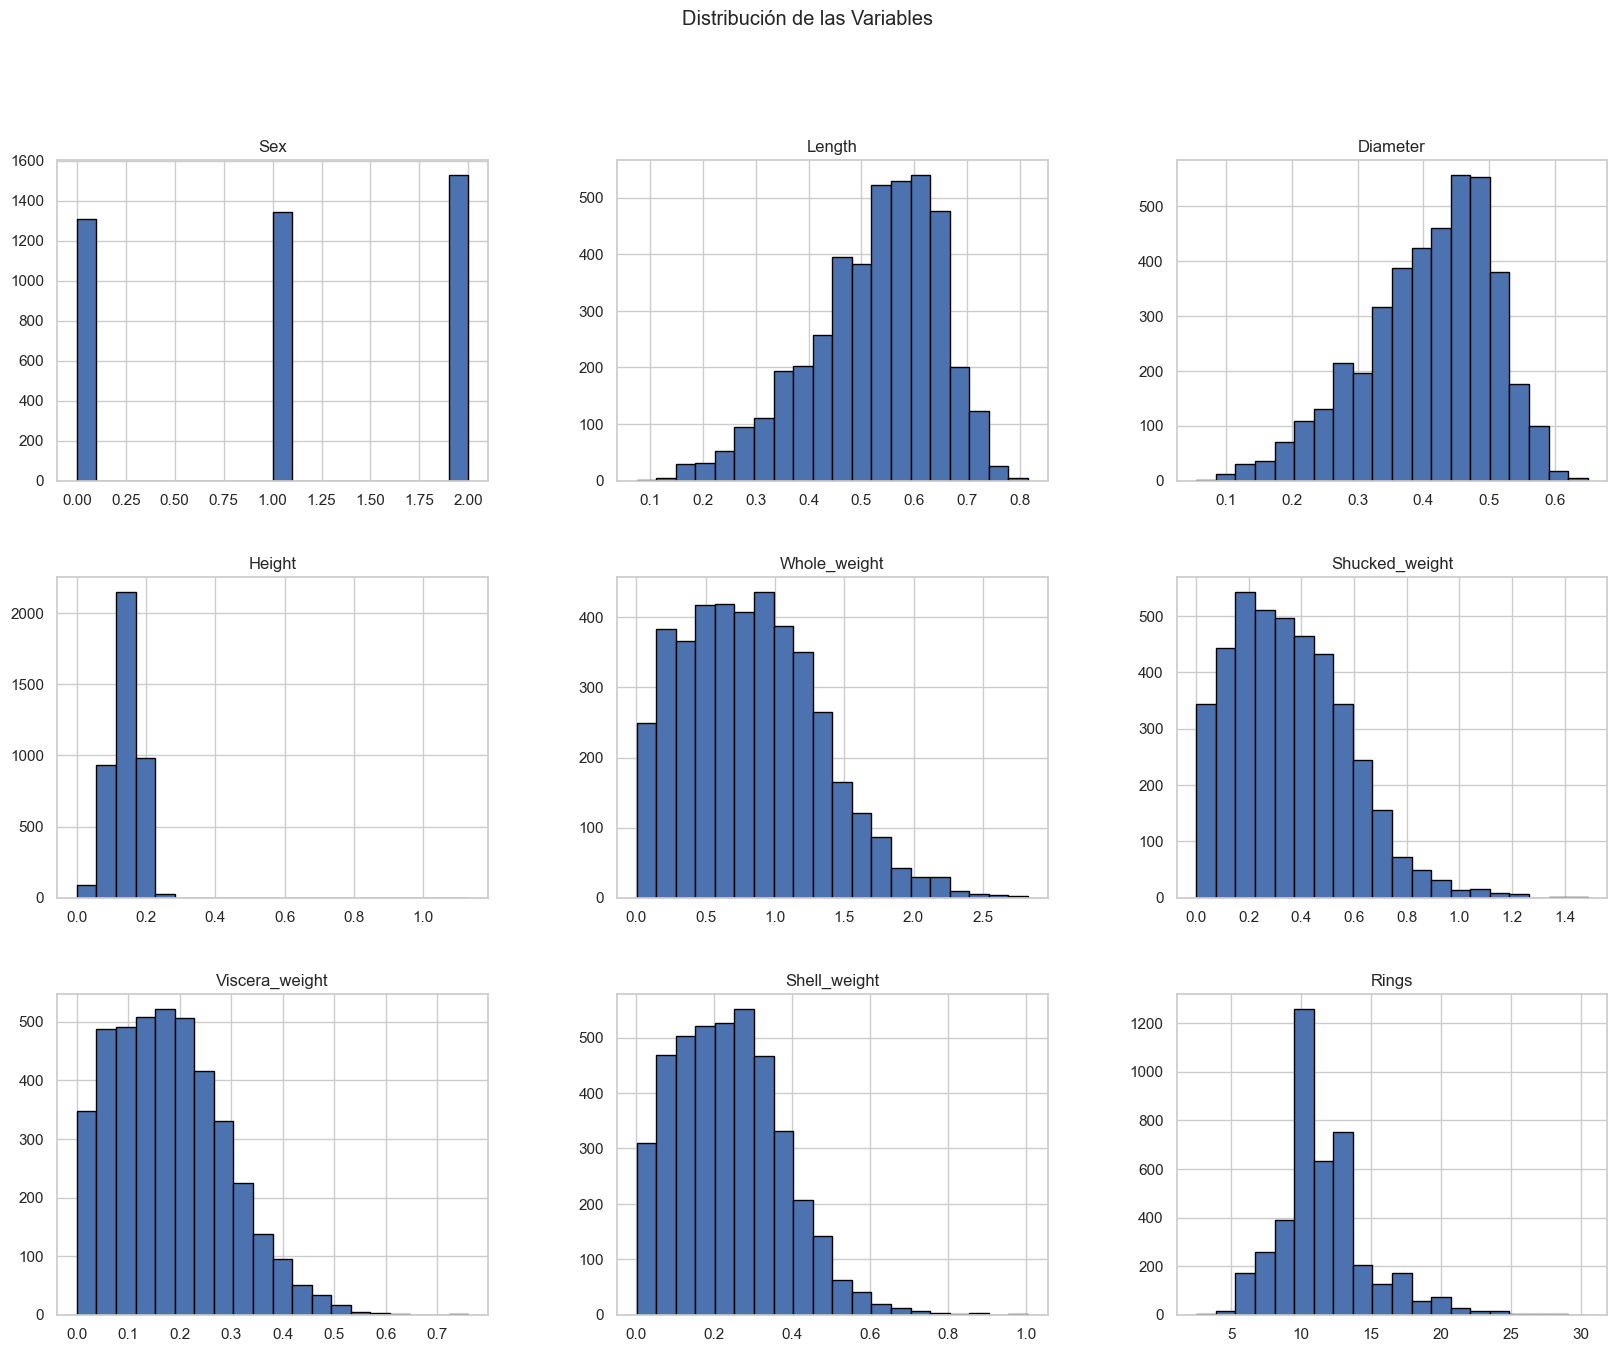

In [23]:
# Configuración de estilo para seaborn
sns.set_theme(style="whitegrid")

# Crear un histograma para cada variable
df.hist(bins=20, figsize=(20, 15), edgecolor='black')
plt.suptitle("Distribución de las Variables")
plt.show()

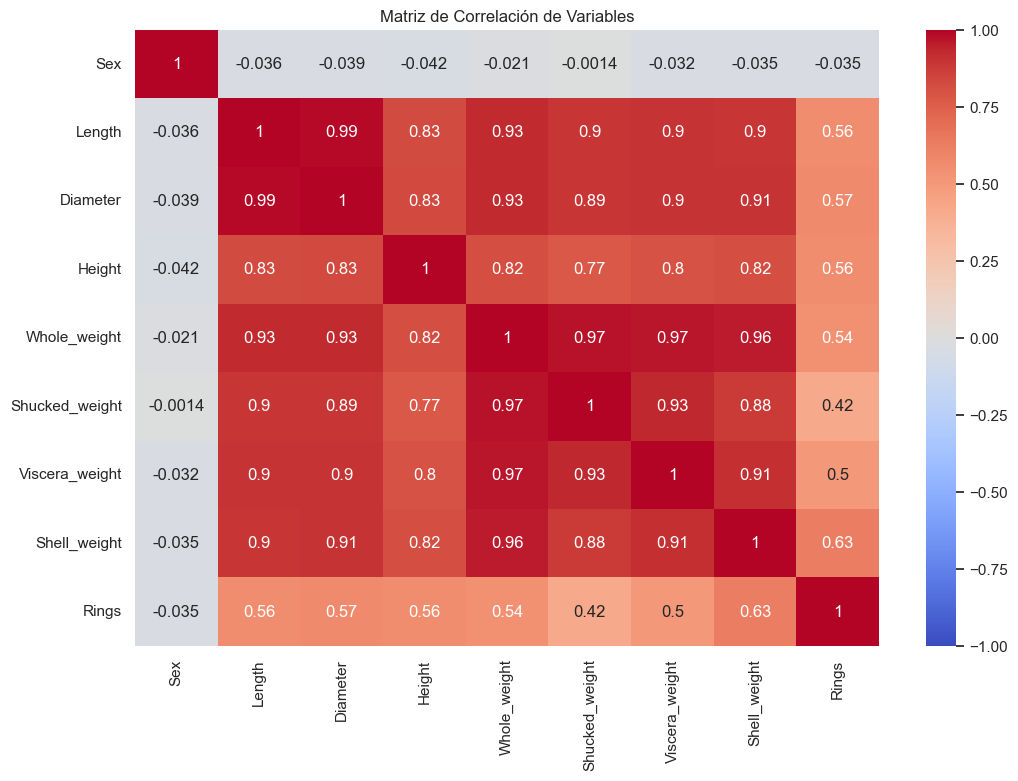

In [24]:
corr_matrix = df.corr()

# Mostrar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de Correlación de Variables")
plt.show()

In [25]:
display(corr_matrix)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole_weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked_weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera_weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell_weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [26]:
# Encontrar las correlaciones con la variable 'type'
correlations_with_type = corr_matrix['Rings'].drop('Rings').abs().sort_values(ascending=False)

# Imprimir las correlaciones con la variable 'type'
print("Correlaciones de las variables con 'Rings':")
print(correlations_with_type)

Correlaciones de las variables con 'Rings':
Shell_weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole_weight      0.540390
Viscera_weight    0.503819
Shucked_weight    0.420884
Sex               0.034627
Name: Rings, dtype: float64


C:\Users\Busta\AppData\Local\Temp\ipykernel_8500\2057262063.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_with_type.index, y=correlations_with_type.values, palette='viridis')


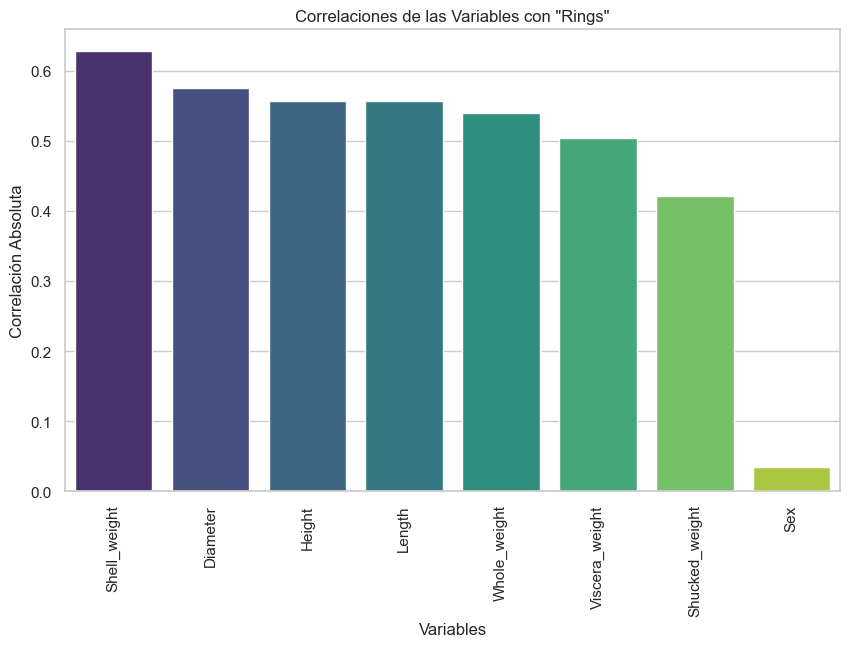

In [27]:
# Graficar las correlaciones con la variable 'Rings'
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations_with_type.index, y=correlations_with_type.values, palette='viridis')
plt.xlabel('Variables')
plt.ylabel('Correlación Absoluta')
plt.title('Correlaciones de las Variables con "Rings"')
plt.xticks(rotation=90)
plt.show()

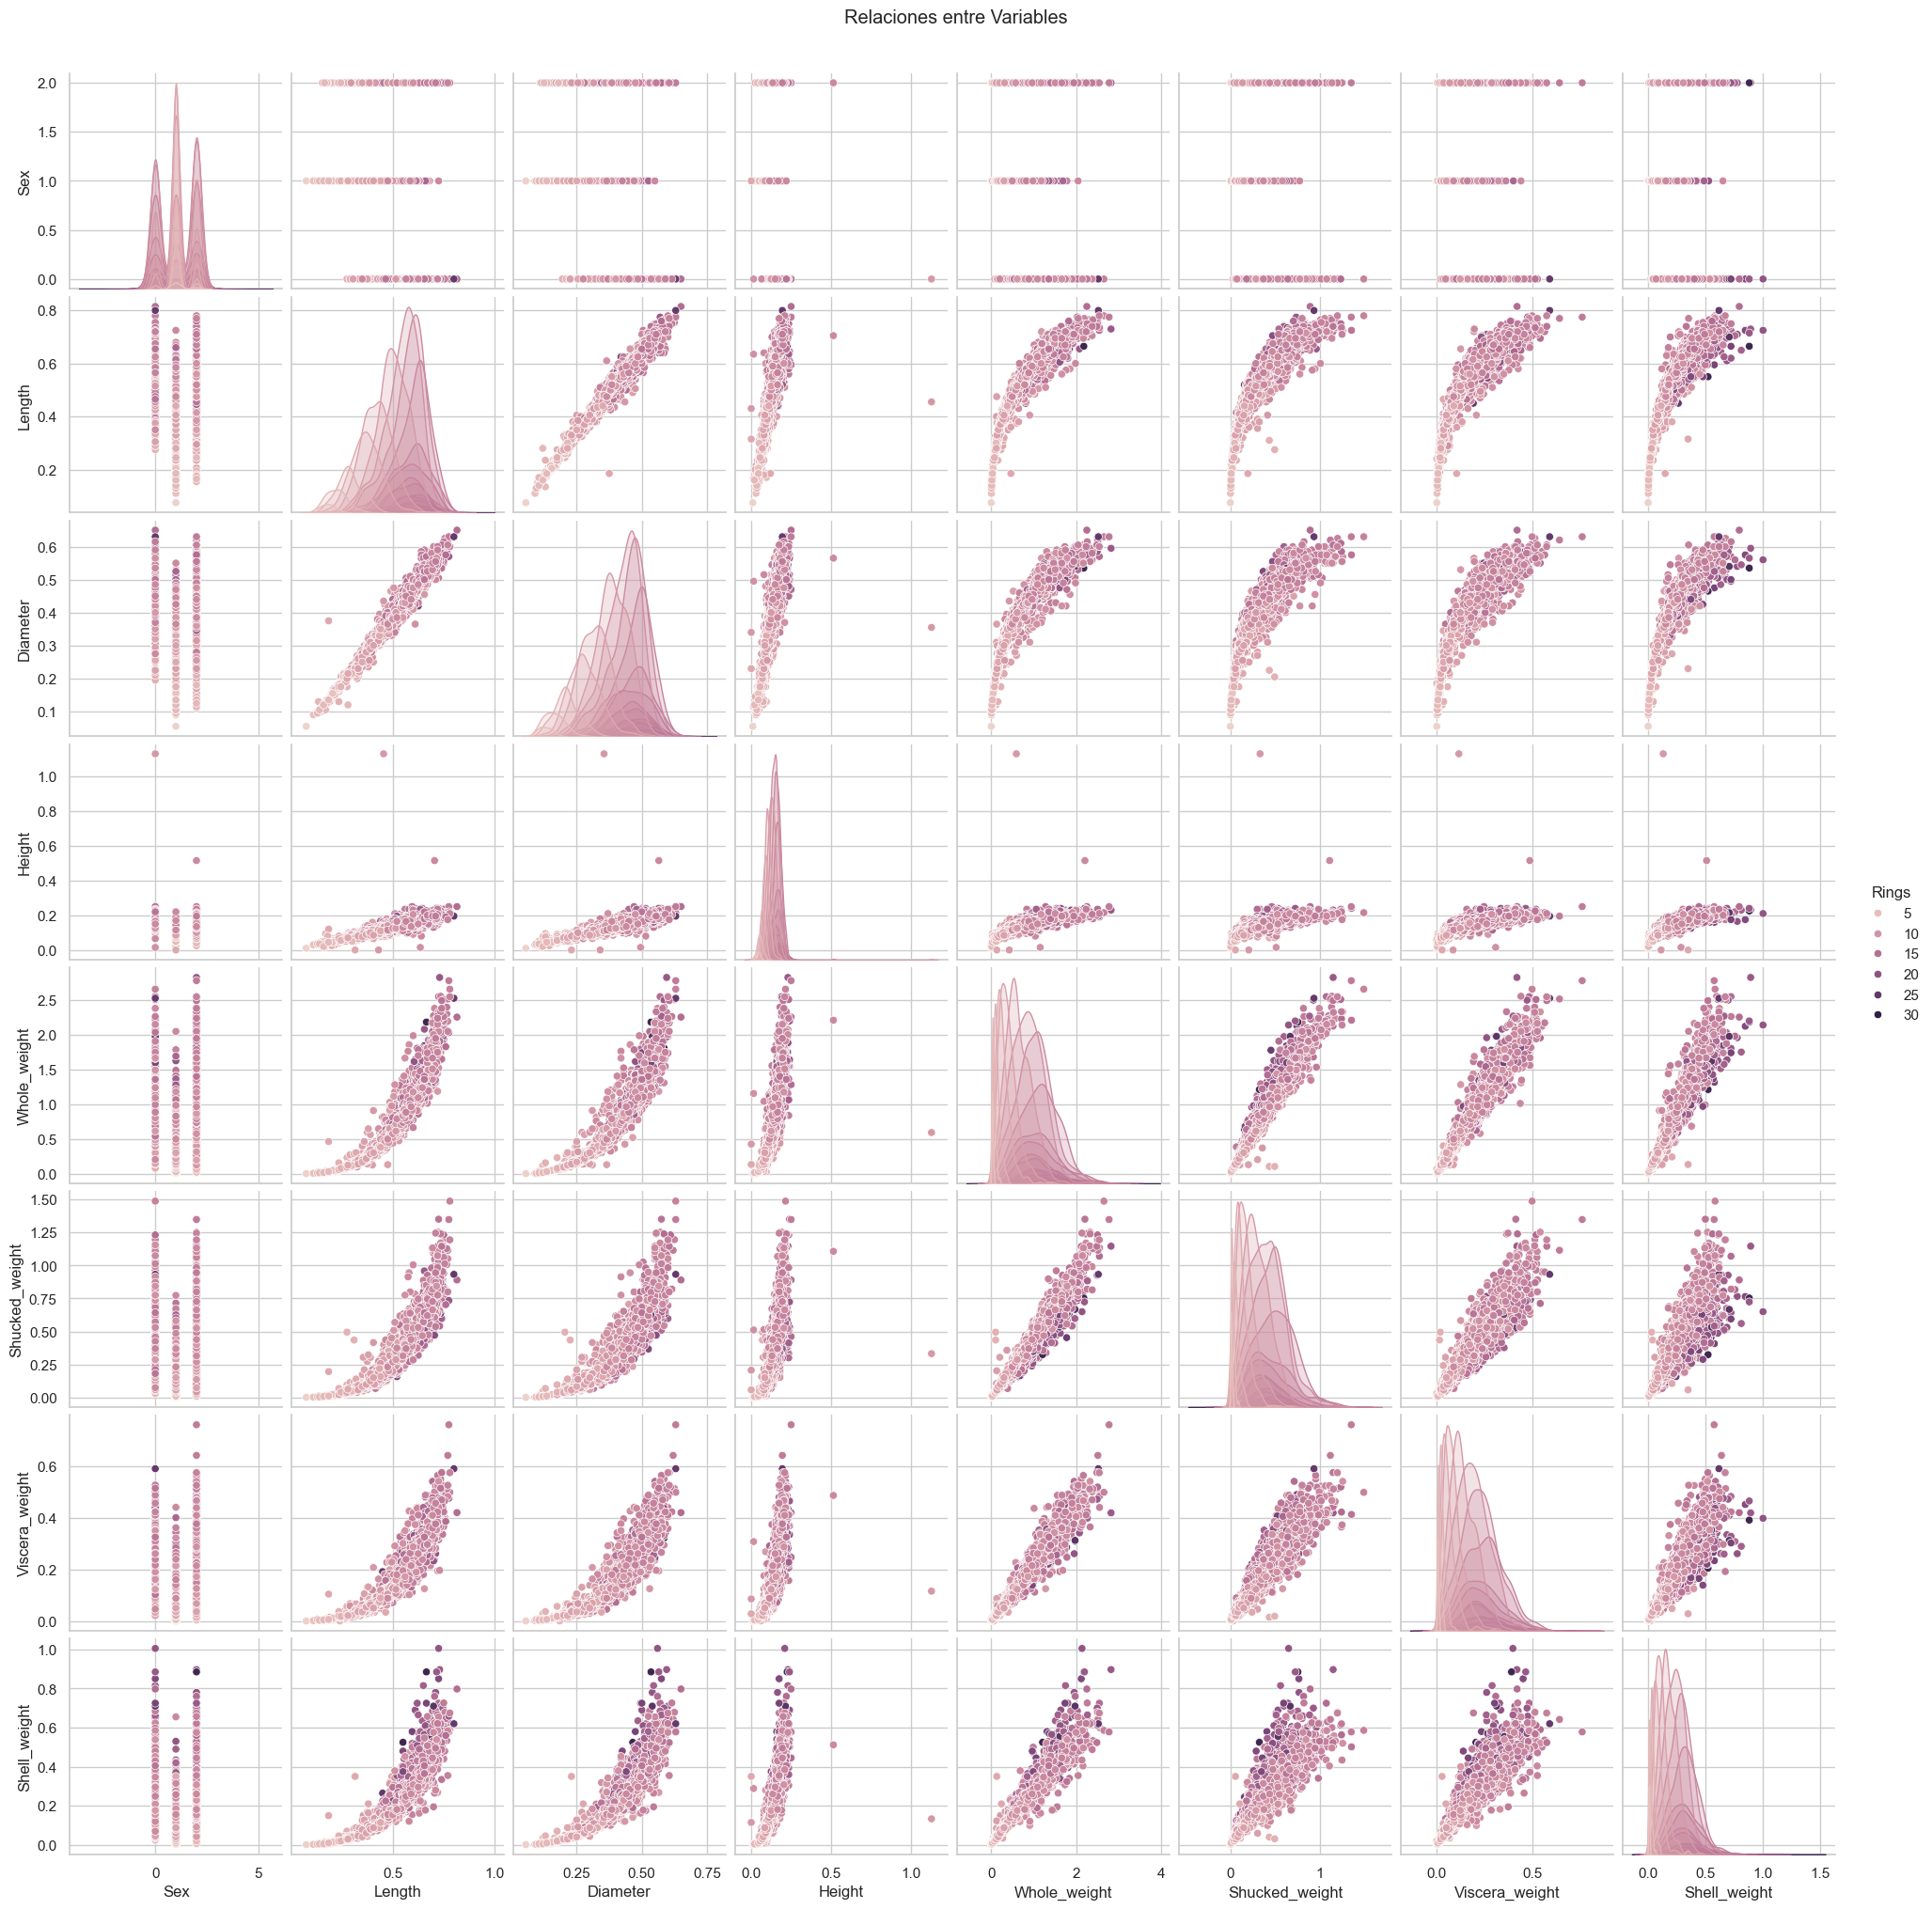

In [28]:
# Crear un pairplot para ver las relaciones entre las variables
sns.pairplot(df, diag_kind='kde', hue='Rings')
plt.suptitle("Relaciones entre Variables", y=1.02)
plt.show()

In [29]:
print(df.columns)

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')


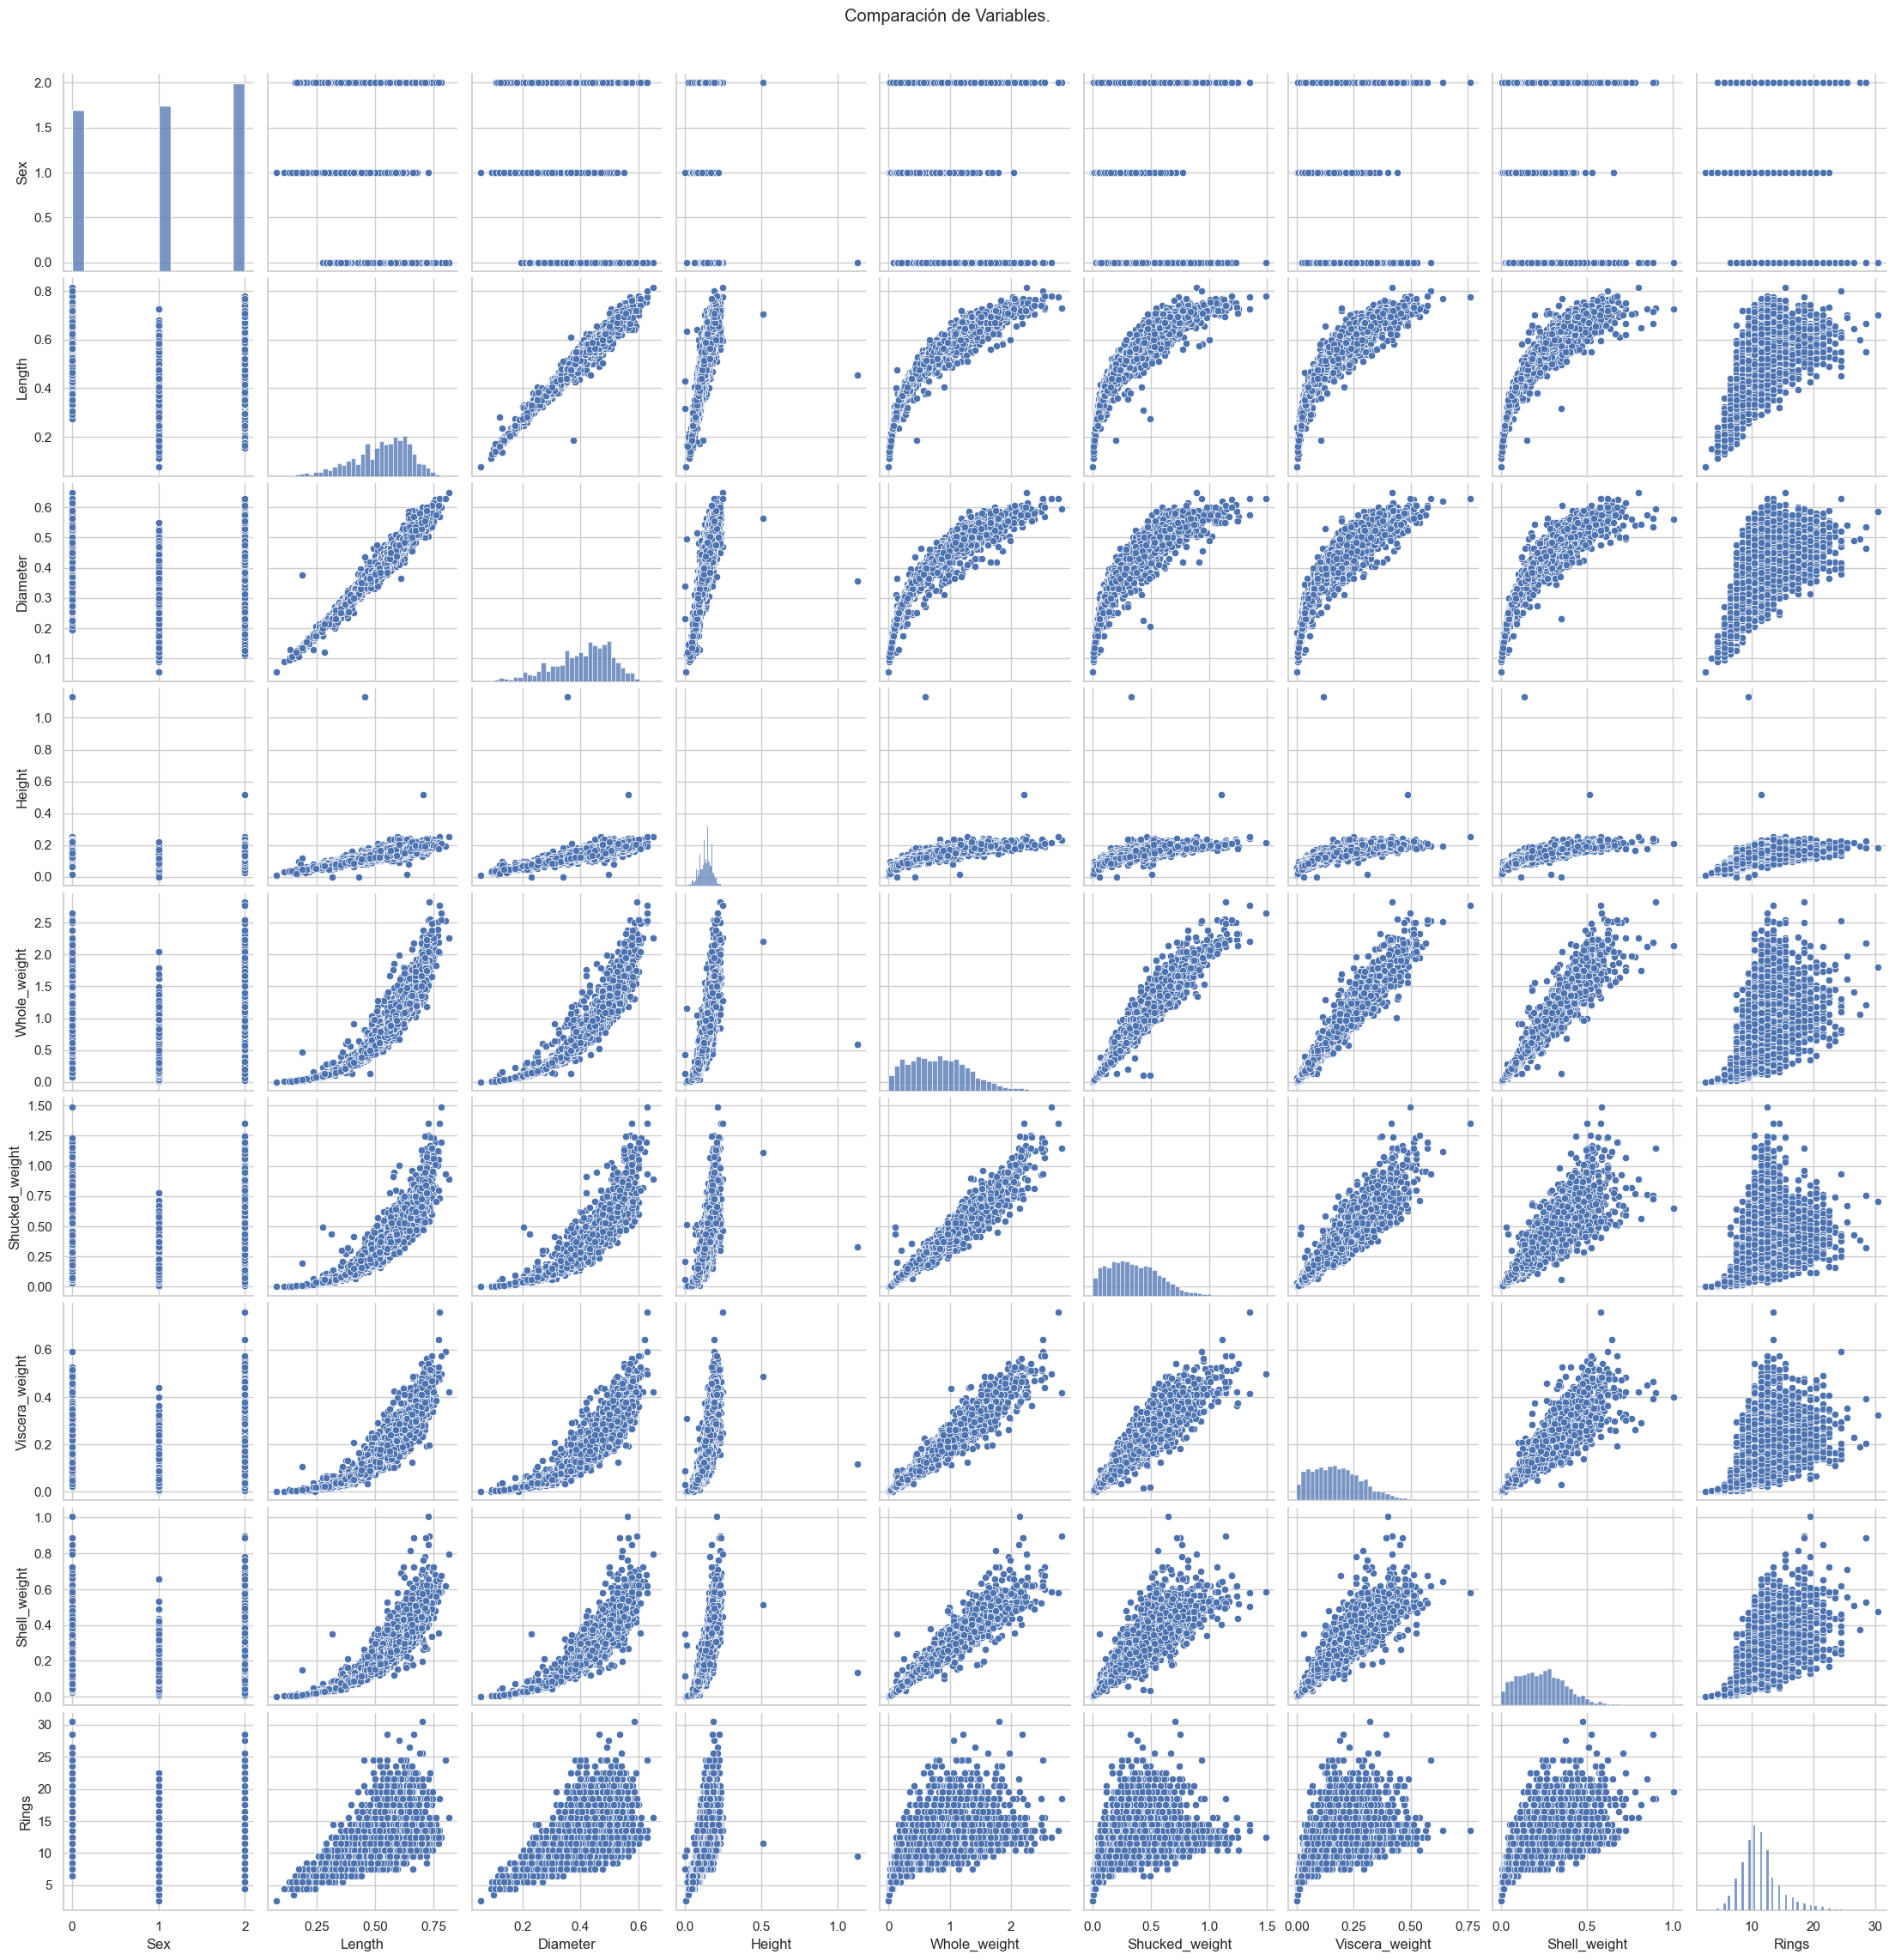

In [30]:
# Crear el gráfico de pares
sns.pairplot(df[['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings']])
plt.suptitle("Comparación de Variables.", y=1.02)
plt.show()

# 🪓 Partición de los datos.

In [31]:
xP.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight'],
      dtype='object')

In [32]:
# Dividir el conjunto de datos en entrenamiento y prueba
xP_Train, xP_Test, yP_Train, yP_Test = train_test_split(xP, yP, test_size=0.3, random_state=42)

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
# Agregar características polinómicas
poly = PolynomialFeatures(degree=2, include_bias=False)
xP = poly.fit_transform(xP)

In [35]:
#print("Prediccion: ",xP_Train.shape, xP_Test.shape, yP_Train.shape, yP_Test.shape)

# 🖥️ Predicción. 

## Método 1: Regresión Lineal.

In [36]:
from sklearn.linear_model import Ridge, Lasso

In [37]:
lrModel = LinearRegression(fit_intercept=True)
lrModel.fit(xP_Train, yP_Train)

LinearRegression()

In [38]:
lrModel.score(xP_Train, yP_Train)

0.5320433280588617

In [39]:
yPred_Test = lrModel.predict(xP_Test)

In [40]:
print(f"Valores de prueba:\n{xP_Test[:5]}")
print(f"Valores predichos:\n{np.round(yPred_Test[:5],2)}")

Valores de prueba:
      Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
866     2   0.605     0.455   0.160        1.1035          0.4210   
1483    2   0.590     0.440   0.150        0.8725          0.3870   
599     0   0.560     0.445   0.195        0.9810          0.3050   
1702    0   0.635     0.490   0.170        1.2615          0.5385   
670     2   0.475     0.385   0.145        0.6175          0.2350   

      Viscera_weight  Shell_weight  
866           0.3015         0.325  
1483          0.2150         0.245  
599           0.2245         0.335  
1702          0.2665         0.380  
670           0.1080         0.215  
Valores predichos:
[[13.24]
 [11.56]
 [15.5 ]
 [13.42]
 [12.44]]


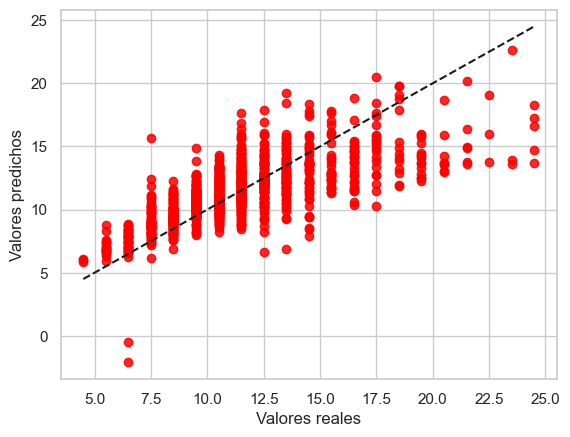

In [41]:
xaxis = np.linspace(np.min(yP_Test),np.max(yP_Test),100)

plt.figure(dpi=100)
plt.scatter(yP_Test, yPred_Test, c='red',alpha=0.85)
plt.plot(xaxis,xaxis,'k--')
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.show()

In [67]:
# Calcula las métricas de regresión
mse = mean_squared_error(yP_Test, yPred_Test)
mae = mean_absolute_error(yP_Test, yPred_Test)
r2 = r2_score(yP_Test, yPred_Test)

# Imprime las métricas
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R^2 Score: {r2:.4f}')

Mean Squared Error (MSE): 4.9264
Mean Absolute Error (MAE): 1.6187
R^2 Score: 0.5149


# 🪞Replica.

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression

In [55]:
def preprocess_Train(df, target, task):
    df = df.copy()
    
    yF = df[target].copy()
    xF = df.drop(target, axis=1).copy()
    
    xfTrain, xfTest, yfTrain, yfTest = train_test_split(xF, yF, train_size=0.7, random_state=1)

    scaler = StandardScaler()
    scaler.fit(xfTrain)
    xfTrain = pd.DataFrame(scaler.transform(xfTrain), columns=xF.columns)
    xfTest = pd.DataFrame(scaler.transform(xfTest), columns=xF.columns)
    
    if task == 'regression':
        model = LinearRegression()
    elif task == 'classification':
        model = LogisticRegression()
    
    model.fit(xfTrain, yfTrain)
    
    return model.score(xfTest, yfTest)

In [50]:
display(df)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [62]:
results = preprocess_Train(df, target='Rings', task='regression')
print("Rings Regression R^2: {:.4f}".format(results))

Rings Regression R^2: 0.5077


In [74]:
results = preprocess_Train(df, target='Shell_weight', task='regression')
print("Shell-Weight Regression R^2: {:.4f}".format(results))

Shell-Weight Regression R^2: 0.9511


In [77]:
results = preprocess_Train(df, target='Viscera_weight', task='regression')
print("Viscera-Weight Regression R^2: {:.4f}".format(results))

Viscera-Weight Regression R^2: 0.9458


In [78]:
results = preprocess_Train(df, target='Shucked_weight', task='regression')

print("Shucked-Weight Regression R^2: {:.4f}".format(results))

Shucked-Weight Regression R^2: 0.9676


In [79]:
results = preprocess_Train(df, target='Whole_weight', task='regression')

print("Whole-Weight Regression R^2: {:.4f}".format(results))

Whole-Weight Regression R^2: 0.9908


In [80]:
results =  preprocess_Train(df, target='Height', task='regression')
print("Height Regression R^2: {:.4f}".format(results))

Height Regression R^2: 0.8135


In [81]:
results = preprocess_Train(df, target='Diameter', task='regression')
print("Diameter Regression R^2: {:.4f}".format(results))

Diameter Regression R^2: 0.9756


In [82]:
results = preprocess_Train(df, target='Length', task='regression')
print("Length Regression R^2: {:.4f}".format(results))

Length Regression R^2: 0.9752


In [84]:
results = preprocess_Train(df, target='Sex', task='classification')
print("Sex Classification Accuracy: {:.2f}%".format(results * 100))

Sex Classification Accuracy: 57.10%
